In [1]:
##Team Names
# Marim Ashraf Elsayed Mahmoud Amer
# Mawada Ashraf Elsayed Mahmoud Amer
# Youmna Alsayed AbdAlatty Mohamed

In [2]:
#Import Liberaries

import pandas as pd
import numpy as np
from sklearn import metrics
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(threshold= sys.maxsize)
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,roc_curve, plot_roc_curve,roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [3]:
#Load the Data
data = pd.read_csv('data.csv',index_col=0)

In [4]:
# data.head()
data[data.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [5]:
data.drop(240,axis = 0, inplace=True)
data.drop(223,axis = 0, inplace=True)

In [6]:
X = data.iloc[:,:13]
y = data.iloc[:, -1]

## One-hot Encoding

In [7]:
from sklearn.compose import ColumnTransformer

# location
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1,2,3,7,8,9,10,11,12])],remainder='passthrough')
X= ct.fit_transform(X).toarray()

In [8]:
# Normalization
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(X)

## Splitting data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
#Splitting data into training, testing and  validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.5)

In [11]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.717391,1.0,0.0,0.583333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.369565,0.0,1.0,0.250000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.978261,0.0,1.0,0.583333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.782609,0.0,0.0,0.583333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826087,1.0,0.0,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.094203,0.0,1.0,0.583333
340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.630435,0.0,0.0,0.250000
341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.637681,0.0,0.0,0.583333
342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.326087,0.0,0.0,0.583333


# Algorithms

# K Nearest Neighbors Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

### Optimal Hyperparameters

In [13]:
k_max = 26
knn_param = {
    "n_neighbors": list(range(1, k_max, 2)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

In [14]:
knn_clf_cv = GridSearchCV(
    knn_classifier, knn_param, cv=10, scoring='recall')

### Training the K-NN model

In [15]:
best_knn = knn_clf_cv.fit(X_train,y_train).best_estimator_
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

### Predicting the Test set

In [16]:
y_pred_knn = best_knn.predict(X_test)

### Confusion Matrix

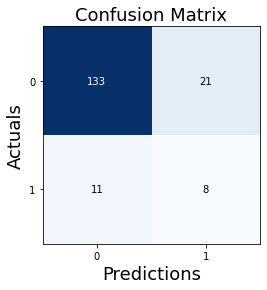

In [17]:
cm = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# roc_auc_score(y_test.to_numpy(), y_pred)

### Get Precision, Recall, f1-score

In [18]:
# f1-score, precision, Recall
print(classification_report(y_test, y_pred_knn))
knn_f1=f1_score(y_test, y_pred_knn)
knn_acc=accuracy_score(y_test, y_pred_knn)
knn_rec=recall_score(y_test,y_pred_knn)
knn_pre=precision_score(y_test,y_pred_knn)
print('KNN f1-score =',knn_f1)
print('KNN precision = ',knn_pre)
print('KNN Recall = ',knn_rec)
print('KNN Accuracy = ',knn_acc)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       154
           1       0.28      0.42      0.33        19

    accuracy                           0.82       173
   macro avg       0.60      0.64      0.61       173
weighted avg       0.85      0.82      0.83       173

KNN f1-score = 0.3333333333333333
KNN precision =  0.27586206896551724
KNN Recall =  0.42105263157894735
KNN Accuracy =  0.815028901734104


### ROC/AUC curve

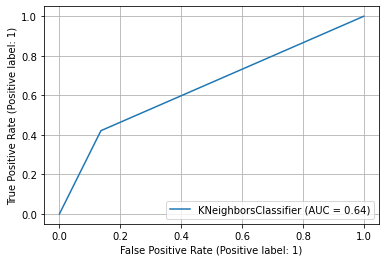

In [19]:
plot_roc_curve(best_knn, X_test, y_test)
plt.grid()

In [20]:
roc_auc_score(y_test, y_pred_knn)

0.6423444976076556

# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
Gaussian_nb = GaussianNB()
Gaussian_nb.fit(X_train, y_train)

GaussianNB()

### Validation before Optimal Hyperparameters

In [22]:
y_pred = Gaussian_nb.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[259  39]
 [ 17  29]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       298
           1       0.43      0.63      0.51        46

    accuracy                           0.84       344
   macro avg       0.68      0.75      0.71       344
weighted avg       0.87      0.84      0.85       344



In [23]:
f1_score(y_val, y_pred, average='binary') 

0.5087719298245614

### Optimal Hyperparameters

In [24]:
nb_classifier = GaussianNB()
param_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = param_nb, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
naive_B = GaussianNB(var_smoothing = var_value)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### Validation after Optimal Hyperparameters

In [25]:
naive_B.fit(X_train, y_train)
y_pred = naive_B.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[296   2]
 [ 36  10]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       298
           1       0.83      0.22      0.34        46

    accuracy                           0.89       344
   macro avg       0.86      0.61      0.64       344
weighted avg       0.88      0.89      0.86       344



In [26]:
f1_score(y_val, y_pred, average='binary') 

0.3448275862068966

### Testing

In [27]:
# Testing
y_pred_naive = naive_B.predict(X_test)

### Confusion Matrix

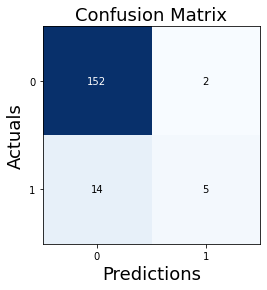

In [28]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_naive)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# roc_auc_score(y_test, y_pred)

### Get Precision, Recall, f1-score

In [29]:
# f1-score, precision, Recall
print(classification_report(y_test, y_pred_knn))
naive_f1=f1_score(y_test, y_pred_naive)
naive_acc=accuracy_score(y_test, y_pred_naive)
naive_rec=recall_score(y_test,y_pred_naive)
naive_pre=precision_score(y_test,y_pred_naive)
print('Naive Bayes f1-score =',naive_f1)
print('Naive Bayes precision = ',naive_pre)
print('Naive Bayes Recall = ',naive_rec)
print('Naive Bayes Accuracy = ',naive_acc)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       154
           1       0.28      0.42      0.33        19

    accuracy                           0.82       173
   macro avg       0.60      0.64      0.61       173
weighted avg       0.85      0.82      0.83       173

Naive Bayes f1-score = 0.3846153846153846
Naive Bayes precision =  0.7142857142857143
Naive Bayes Recall =  0.2631578947368421
Naive Bayes Accuracy =  0.9075144508670521


### ROC/AUC curve

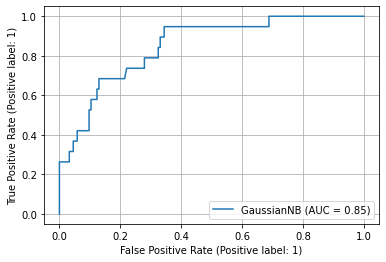

In [30]:
# ROC curve 
plot_roc_curve(naive_B, X_test, y_test)
plt.grid()

In [31]:
roc_auc_score(y_test, y_pred_naive)

0.6250854408749146

# Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### Validation before Optimal Hyperparameters

In [33]:
y_pred = svc.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[298   0]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       298
           1       1.00      0.13      0.23        46

    accuracy                           0.88       344
   macro avg       0.94      0.57      0.58       344
weighted avg       0.90      0.88      0.84       344



In [34]:
f1_score(y_val, y_pred, average='binary') 

0.23076923076923078

### Optimal Hyperparameters

In [35]:
svm_hyparam_grid = {
    "C": [100, 10, 1.0, 0.1, 0.001],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "degree": list(range(1,20)),
    'gamma':['scale', 'auto']
}

svc_grid = GridSearchCV(svc, param_grid = svm_hyparam_grid , refit = True, verbose = 1, cv=10)
best_svm= svc_grid.fit(X_train , y_train).best_estimator_

Fitting 10 folds for each of 760 candidates, totalling 7600 fits


### Validation after Optimal Hyperparameters

In [36]:
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[297   1]
 [ 27  19]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       298
           1       0.95      0.41      0.58        46

    accuracy                           0.92       344
   macro avg       0.93      0.70      0.77       344
weighted avg       0.92      0.92      0.90       344



In [37]:
f1_score(y_val, y_pred, average='binary') 

0.5757575757575758

### Testing

In [38]:
# Testing
y_pred_svm = best_svm.predict(X_test)

### Confusion Matrix

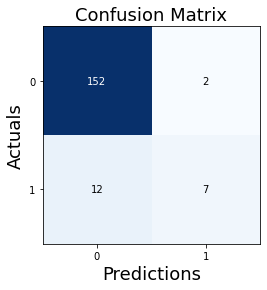

In [39]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Get Precision, Recall, f1-score

In [40]:
# f1-score, precision, Recall
print(classification_report(y_test, y_pred_svm))
svm_f1=f1_score(y_test, y_pred_svm)
svm_acc=accuracy_score(y_test, y_pred_svm)
svm_rec=recall_score(y_test,y_pred_svm)
svm_pre=precision_score(y_test,y_pred_svm)
print('SVM f1-score =',svm_f1)
print('SVM precision = ',svm_pre)
print('SVM Recall = ',svm_rec)
print('SVM Accuracy = ',svm_acc)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       154
           1       0.78      0.37      0.50        19

    accuracy                           0.92       173
   macro avg       0.85      0.68      0.73       173
weighted avg       0.91      0.92      0.91       173

SVM f1-score = 0.5
SVM precision =  0.7777777777777778
SVM Recall =  0.3684210526315789
SVM Accuracy =  0.9190751445086706


### ROC/AUC curve

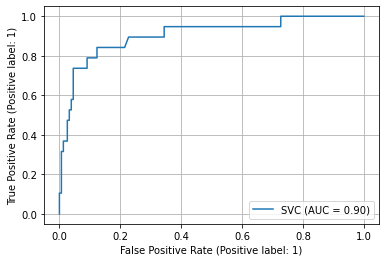

In [41]:
# ROC curve 
plot_roc_curve(best_svm, X_test, y_test)
plt.grid()

In [42]:
roc_auc_score(y_test, y_pred_svm)

0.6777170198222829

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = log_reg.predict(X_val)

### Validation before Optimal hyperparameters

In [45]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[297   1]
 [ 34  12]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       298
           1       0.92      0.26      0.41        46

    accuracy                           0.90       344
   macro avg       0.91      0.63      0.68       344
weighted avg       0.90      0.90      0.87       344



In [46]:
f1_score(y_val, y_pred, average='binary') 

0.4067796610169491

### Optimal Hyperparameters

In [47]:
model = LogisticRegression()
best_values = []
lg_hyper = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l2','11', 'elasticnet','none'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}
LR_model_search = GridSearchCV(model, param_grid = lg_hyper, verbose = 1, cv=7)
LR_model_search.fit(X_train , y_train)
best_values = list(LR_model_search.best_params_.values())
print(best_values)
LR_model = LogisticRegression(penalty= best_values[1], C= best_values[0] , solver= best_values[2])
LR_model.fit(X_train, y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


C:\Users\Mawada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mawada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[100, 'l2', 'sag']


C:\Users\Mawada\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=100, solver='sag')

### Validation after Optimal hyperparameters

In [48]:
y_pred = LR_model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[294   4]
 [ 20  26]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       298
           1       0.87      0.57      0.68        46

    accuracy                           0.93       344
   macro avg       0.90      0.78      0.82       344
weighted avg       0.93      0.93      0.92       344



In [49]:
f1_score(y_val, y_pred, average='binary') 

0.6842105263157895

### Testing

In [50]:
#y_pre results after Optimal hyperparameters
y_pred_LR = LR_model.predict(X_test)

### Confusion Matrix

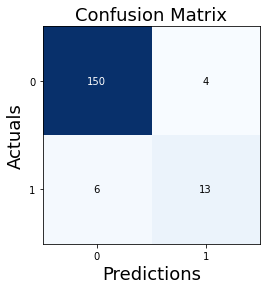

In [51]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Get Precision, Recall, f1-score

In [52]:
# f1-score, precision, Recall
print(classification_report(y_test, y_pred_LR))
LR_f1=f1_score(y_test, y_pred_LR)
LR_acc=accuracy_score(y_test, y_pred_LR)
LR_rec=recall_score(y_test,y_pred_LR)
LR_pre=precision_score(y_test,y_pred_LR)
print('LR f1-score =',LR_f1)
print('LR precision = ',LR_pre)
print('LR Recall = ',LR_rec)
print('LR Accuracy = ',LR_acc)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       154
           1       0.76      0.68      0.72        19

    accuracy                           0.94       173
   macro avg       0.86      0.83      0.84       173
weighted avg       0.94      0.94      0.94       173

LR f1-score = 0.7222222222222222
LR precision =  0.7647058823529411
LR Recall =  0.6842105263157895
LR Accuracy =  0.9421965317919075


### ROC/AUC curve 

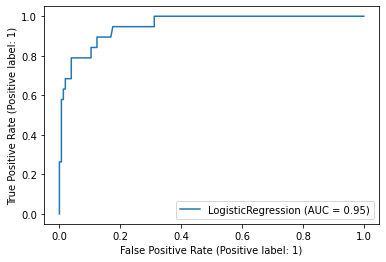

In [53]:
metrics.plot_roc_curve(LR_model, X_test, y_test)

In [54]:
roc_auc_score(y_test, y_pred_LR)

0.8291182501708817

# Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [56]:
y_pred = DT.predict(X_val)

### Validation before Optimal hyperparameters

In [57]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[294   4]
 [ 25  21]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       298
           1       0.84      0.46      0.59        46

    accuracy                           0.92       344
   macro avg       0.88      0.72      0.77       344
weighted avg       0.91      0.92      0.90       344



In [58]:
f1_score(y_val, y_pred, average='binary') 

0.5915492957746479

### Optimal Hyperparameters

In [59]:
model = DecisionTreeClassifier()
best_values = []
DT_hyper = {
    'max_depth': np.arange(1,18),
    'max_features': np.arange(1,18) 
}
DT_model_search = GridSearchCV(model, param_grid = DT_hyper, verbose = 1, cv=7)
DT_model_search.fit(X_train , y_train)
best_values = list(DT_model_search.best_params_.values())
print(best_values)
DT_model = DecisionTreeClassifier(criterion = "entropy", max_depth= best_values[0], max_features = best_values[1], random_state=3)
DT_model.fit(X_train, y_train)

Fitting 7 folds for each of 289 candidates, totalling 2023 fits
[15, 12]


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=12,
                       random_state=3)

### Validation after Optimal hyperparameters

In [60]:
y_pred = DT_model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[296   2]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       298
           1       0.75      0.13      0.22        46

    accuracy                           0.88       344
   macro avg       0.82      0.56      0.58       344
weighted avg       0.86      0.88      0.84       344



In [61]:
f1_score(y_val, y_pred, average='binary') 

0.22222222222222218

### Testing

In [62]:
#y_pre results after Optimal hyperparameters
y_pred_DT = DT_model.predict(X_test)

### Confusion Matrix

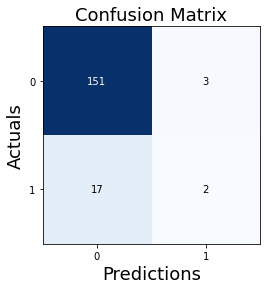

In [63]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_DT)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Get Precision, Recall, f1-score

In [64]:
# f1-score, precision, Recall
print(classification_report(y_test, y_pred_DT))
DT_f1=f1_score(y_test, y_pred_DT)
DT_acc=accuracy_score(y_test, y_pred_DT)
DT_rec=recall_score(y_test,y_pred_DT)
DT_pre=precision_score(y_test,y_pred_DT)
print('DT f1-score =',DT_f1)
print('DT precision = ',DT_pre)
print('DT Recall = ',DT_rec)
print('DT Accuracy = ',DT_acc)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       154
           1       0.40      0.11      0.17        19

    accuracy                           0.88       173
   macro avg       0.65      0.54      0.55       173
weighted avg       0.84      0.88      0.85       173

DT f1-score = 0.16666666666666666
DT precision =  0.4
DT Recall =  0.10526315789473684
DT Accuracy =  0.884393063583815


### Decision Tree ROC/AUC curves

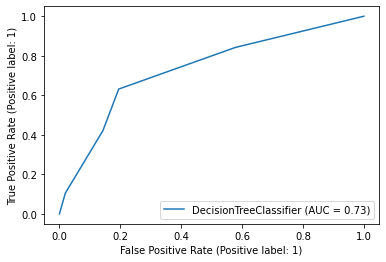

In [65]:
metrics.plot_roc_curve(DT_model, X_test, y_test)

In [66]:
roc_auc_score(y_test, y_pred_DT)

0.5428913192071086

# ROC Curve for All Models

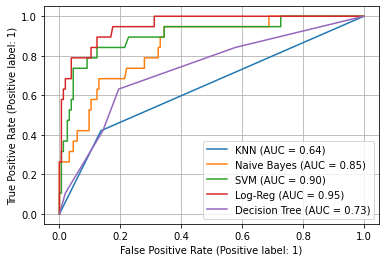

In [67]:
display = plot_roc_curve(best_knn,X_test,y_test,name="KNN")
plot_roc_curve(naive_B, X_test, y_test,ax=display.ax_,name="Naive Bayes")
plot_roc_curve(best_svm,X_test,y_test,ax=display.ax_,name="SVM")
plot_roc_curve(LR_model, X_test, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(DT_model,X_test,y_test,ax=display.ax_,name="Decision Tree")
plt.grid()
plt.show()

# Result

In [68]:
data = {'Classifiers':['KNN', 'Naive Bayes', 'Support Vector Machine', 'Logistic Regression','Decision Tree'],
        'Accuracy':[knn_acc, naive_acc, svm_acc, LR_acc,DT_acc],
       'F1 Score':[knn_f1, naive_f1, svm_f1, LR_f1,DT_f1],
       'Recall Score':[knn_rec, naive_rec, svm_rec, LR_rec,DT_rec],
       'Precision':[knn_pre, naive_pre, svm_pre, LR_pre,DT_pre]}

df = pd.DataFrame(data).set_index('Classifiers')

df

,Accuracy,F1 Score,Recall Score,Precision
Classifiers,,,,
KNN,0.815029,0.333333,0.421053,0.275862
Naive Bayes,0.907514,0.384615,0.263158,0.714286
Support Vector Machine,0.919075,0.500000,0.368421,0.777778
Logistic Regression,0.942197,0.722222,0.684211,0.764706
Decision Tree,0.884393,0.166667,0.105263,0.400000
